In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def multiGaussian(x,mu,sigma):
    return 1/((2*np.pi)*pow(np.linalg.det(sigma),0.5))*np.exp(-0.5*(x-mu).dot(np.linalg.pinv(sigma)).dot((x-mu).T))

def computeGamma(X,mu,sigma,alpha,multiGaussian):
    n_samples=X.shape[0]
    n_clusters=len(alpha)
    gamma=np.zeros((n_samples,n_clusters))
    p=np.zeros(n_clusters)
    g=np.zeros(n_clusters)
    for i in range(n_samples):
        for j in range(n_clusters):
            p[j]=multiGaussian(X[i],mu[j],sigma[j])
            g[j]=alpha[j]*p[j]
        for k in range(n_clusters):
            gamma[i,k]=g[k]/np.sum(g)
    return gamma

In [3]:
class MyGMM():
    def __init__(self,n_clusters,ITER=50):
        self.n_clusters=n_clusters
        self.ITER=ITER
        self.mu=0
        self.sigma=0
        self.alpha=0
      
    def fit(self,data):
        n_samples=data.shape[0]
        n_features=data.shape[1]
        
        mu=data[np.random.choice(range(n_samples),self.n_clusters)]
        
        alpha=np.ones(self.n_clusters)/self.n_clusters
        '''
        mu=np.array([[.403,.237],[.714,.346],[.532,.472]])
        '''
        sigma=np.full((self.n_clusters,n_features,n_features),np.diag(np.full(n_features,0.1)))
        for i in range(self.ITER):
            gamma=computeGamma(data,mu,sigma,alpha,multiGaussian)
            alpha=np.sum(gamma,axis=0)/n_samples
            for i in range(self.n_clusters):
                mu[i]=np.sum(data*gamma[:,i].reshape((n_samples,1)),axis=0)/np.sum(gamma,axis=0)[i]
                sigma[i]=0
                for j in range(n_samples):
                    sigma[i]+=(data[j].reshape((1,n_features))-mu[i]).T.dot((data[j]-mu[i]).reshape((1,n_features)))*gamma[j,i]
                sigma[i]=sigma[i]/np.sum(gamma,axis=0)[i]
        self.mu=mu
        self.sigma=sigma
        self.alpha=alpha
        
    def predict(self,data):
        pred=computeGamma(data,self.mu,self.sigma,self.alpha,multiGaussian)
        cluster_results=np.argmax(pred,axis=1)
        return cluster_results

In [4]:
import pandas as pd
data=pd.read_csv('../data/watermelon.csv',header=None)
data=data.values

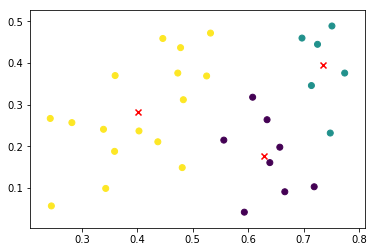

In [5]:
model1=MyGMM(3)
model1.fit(data)
gmm=model1.predict(data)
plt.scatter(data[:,0],data[:,1],c=gmm)
plt.scatter(model1.mu[:,0],model1.mu[:,1],marker='x',color='red')

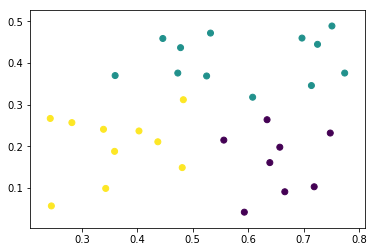

In [6]:
from sklearn.mixture import GaussianMixture
clf=GaussianMixture(n_components=3)
clf.fit(data)
sk_gmm=clf.predict(data)
plt.scatter(data[:,0],data[:,1],c=sk_gmm)

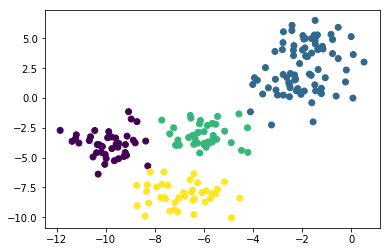

In [7]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=200, n_features=2,centers=5, cluster_std=1.0,random_state=1)
model2=MyGMM(4,100)
model2.fit(X)
result=model2.predict(X)
plt.scatter(X[:,0],X[:,1],c=result)